In [63]:
import pandas as pd
text = pd.DataFrame(open('sustainability_plan.txt', "r", encoding='utf8'), columns=["text"])

In [64]:
text

,text
0,USC\n
1,Sustainability\n
2,Summary\n
3,Report\n
4,2015-20\n
...,...
806,"Facilities Planning and Management, Auxiliary ..."
807,"Procurement, Athletics, USC Dornsife Environme..."
808,"Studies Program, Undergraduate Student Governm..."
809,"Graduate Student Government, Environmental\n"


In [77]:
#remove line breaks
text['text'] = text['text'].str.replace("\n","")
text

,text,text_lower,clean_text
0,USC,usc,usc
1,Sustainability,sustainability,sustainability
2,Summary,summary,summary
3,Report,report,report
4,2015-20,2015-20,20150
...,...,...,...
806,"Facilities Planning and Management, Auxiliary ...","facilities planning and management, auxiliary ...","facilities planning management , auxiliary ser..."
807,"Procurement, Athletics, USC Dornsife Environme...","procurement, athletics, usc dornsife environme...","procurement , athletics , usc dornsife environ..."
808,"Studies Program, Undergraduate Student Governm...","studies program, undergraduate student governm...","studies program , undergraduate student govern..."
809,"Graduate Student Government, Environmental","graduate student government, environmental","graduate student government , environmental"


In [78]:
text['text_lower'] = text['text'].map(lambda x: x.lower())

In [79]:
#set stopwords
from nltk.corpus import stopwords
print(set(stopwords.words('english')))
stopwords = set(stopwords.words('english'))

{'just', 'your', 'itself', 'himself', 'shan', 'down', 'off', 'how', 'ours', 'themselves', 'about', 'been', 'before', 'on', 'then', 'can', "don't", 'here', "didn't", 'having', 'don', "mightn't", 'as', 'such', 'again', 'aren', 'other', 'hers', "isn't", 'shouldn', 'that', 's', 'we', 'be', 'than', 'weren', 'above', 'was', 'do', 'only', 'ain', 'their', 'being', 'up', 'does', "weren't", "won't", 'what', 'couldn', "you're", 't', 'between', 'his', 'why', 'they', 'at', 'who', 'whom', 'her', 'yours', 'is', 'are', 'few', 'am', 'have', 'myself', 'into', "shan't", 'theirs', 'very', 'own', 'a', 'nor', 'so', 'y', 'i', 'all', 'needn', 'an', 'did', 'there', 'ma', 'yourselves', 'mustn', 'yourself', 'but', 'hadn', "you'll", 'below', 'over', 'if', 'won', "hadn't", 'it', 'isn', "that'll", 'our', 'after', 'until', 'too', 'wasn', 'more', 'm', 'she', 'because', 'under', 'these', 'to', 'were', 'haven', 'he', 'will', "hasn't", 'each', 'no', "wasn't", 'once', 'against', "it's", 'same', 'further', 'those', "you'v

In [80]:
import nltk 

cleaned_text = []
for line in text['text_lower']:
    words = nltk.word_tokenize(line)
    new_words = []
    for word in words:
        if word in stopwords:
            continue
        new_words.append(word)
    cleaned = " ".join(new_words)
    cleaned_text.append(cleaned)

In [81]:
text['clean_text'] = cleaned_text
text

,text,text_lower,clean_text
0,USC,usc,usc
1,Sustainability,sustainability,sustainability
2,Summary,summary,summary
3,Report,report,report
4,2015-20,2015-20,2015-20
...,...,...,...
806,"Facilities Planning and Management, Auxiliary ...","facilities planning and management, auxiliary ...","facilities planning management , auxiliary ser..."
807,"Procurement, Athletics, USC Dornsife Environme...","procurement, athletics, usc dornsife environme...","procurement , athletics , usc dornsife environ..."
808,"Studies Program, Undergraduate Student Governm...","studies program, undergraduate student governm...","studies program , undergraduate student govern..."
809,"Graduate Student Government, Environmental","graduate student government, environmental","graduate student government , environmental"


In [82]:
import re
def replace_regex(df, text_col, regex:str, replacement:str):
    '''
    This function serves to replace specified regex matches with preferred text to clean the text 
    for a particular word or name. There are two arguments:
        regex: is the argument that takes the regex pattern that you will replace
        replacement: is the string that will replace words that match the regex pattern
    The function returns the replaced text in a new column called "review1"
    '''
    df[text_col] = df[text_col].str.replace(regex, replacement, flags=re.IGNORECASE, regex=True)

In [83]:
#created a dictionary of all terms that need to be cleaned via regex
text_to_clean = {r'\n':'', #remove newline
                 r'\<\s?br\s?\\?\/?\s?\>':'', #remove breaks
                 r'[^\w\s]' #remove punctuation
                 r'\d':'', #remove all numbers
                }
##these dictionary keys will be fed into a for loop to enter into our regex_cleaning and replace_regex functions  
for token in text_to_clean:
    replace_regex(text, 'clean_text', token, text_to_clean[token])

#remove leading/trailing whitespace -- source: https://stackoverflow.com/questions/10443400/remove-leading-and-trailing-spaces
# reviews_df['review_c'] = reviews_df['review_c'].str.strip()

In [84]:
from collections import Counter

def count_words(lines, delimiter=" "):
    
    words = Counter() # instantiate a Counter object called words
    for line in lines:
        for word in line.split(delimiter):
            words[word] += 1 # increment count for word
    return words

In [85]:
#inital counting is used to identify areas for cleaning
text_cloud = count_words(text['clean_text'])
text_cloud

Counter({'usc': 114,
         'sustainability': 95,
         'summary': 14,
         'report': 17,
         '20150': 14,
         'foundation': 5,
         'laid': 6,
         'future': 5,
         'envisioned': 3,
         '“': 13,
         'core': 2,
         'everything': 1,
         'believe': 1,
         '.': 179,
         '”': 13,
         'dear': 1,
         'trojan': 6,
         'community': 14,
         ',': 176,
         '’': 52,
         'pleasure': 1,
         'share': 2,
         'results': 1,
         '2020': 24,
         'plan': 26,
         '\ue000is': 2,
         'phase': 2,
         'one': 4,
         'collective': 2,
         'efforts': 4,
         'work': 3,
         'toward': 3,
         'healthier': 1,
         'campus': 26,
         'greener': 4,
         'planet': 2,
         'plans': 1,
         'ambitious—as': 1,
         'needed': 1,
         'be—but': 1,
         'accomplished': 2,
         'great': 1,
         'deal': 2,
         'working': 5,
         'tog

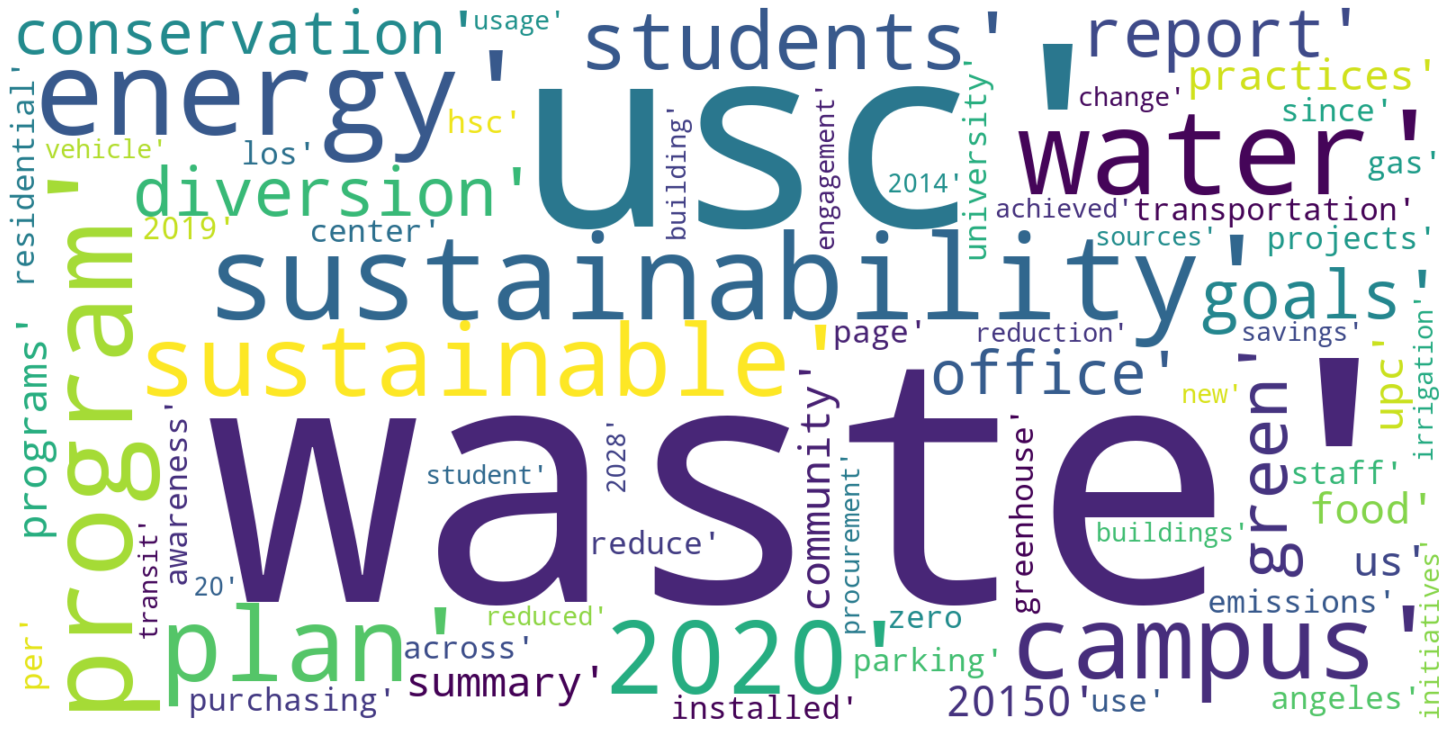

<Figure size 432x288 with 0 Axes>

In [86]:
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
# !pip install wordcloud --user

mostcommon = FreqDist(text_cloud).most_common(80)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
# plt.title('Top 100 Most Common Words', fontsize=50)
plt.tight_layout(pad=0)
plt.show()

plt.savefig('word_cloud.png')

#source: https://towardsdatascience.com/nlp-part-3-exploratory-data-analysis-of-text-data-1caa8ab3f79d#:~:text=Exploratory%20Data%20Analysis%20(EDA)%20is,of%20descriptive%20statistics%20and%20visualizations.